In [146]:
from contexts import ProjectQContext
from projectq.ops import CNOT, Rx, Rz, Tensor, Z, X, C
from projectq.setups import default

In [167]:
def apply_entangler(qureg, pos):
    for i in pos:
        C(X) | (qureg[i], qureg[(i+1)%len(qureg)])

In [163]:
def apply_block(reg, theta, trafie):
    nbit = len(reg)
    apply_entangler(reg, range(0, nbit, 2))
    Tensor(Rz(theta)) | reg[1:nbit:2]
    apply_entangler(reg, list(range(0, nbit, 2)) + list(range(1, nbit, 2)))
    
    Tensor(Rz(theta)) | reg[0:nbit:2]
    apply_entangler(reg, range(1, nbit, 2))
    
    Tensor(Rx(trafie)) | reg

In [164]:
def dynamical_qft(nbit, g, tmax, nslice):
    dt = tmax/nslice
    trafie = dt*g
    theta = -dt
    
    res = []
    with ProjectQContext(nbit, 'simulate') as cc:
        for i in range(nslice):
            apply_block(cc.qureg, theta, trafie)
            wf1 = cc.get_wf()
            Z | cc.qureg[5]
            wf2 = cc.get_wf()
            Z | cc.qureg[5]
            res.append(wf1.conj().dot(wf2).real)
    return res

In [168]:
nslice = 500
tmax = 10
res = dynamical_qft(10, 2.0, 10.0, 500);

(0, 10)

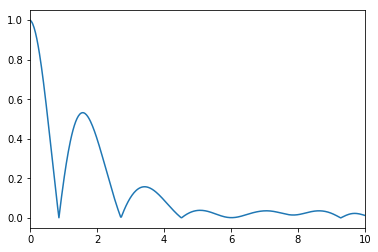

In [169]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.linspace(0, tmax, nslice), np.abs(res))
plt.xlim(0,10)
#plt.ylim(0,1)

In [174]:
%timeit dynamical_qft(18, 2.0, 10.0, 500)

44.9 s ± 483 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [177]:
from profilehooks import profile
dynamical_qft(18, 2.0, 10.0, 500);